In [ ]:
#Task 1: Univariate Analysis

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from google.colab import files
uploaded = files.upload()
df = pd.read_csv("yellow_tripdata_sample.csv")

cols = ["passenger_count", "trip_distance", "fare_amount", "total_amount", "tip_amount", "extra"]

desc_stats = df[cols].describe().T
modes = df[cols].mode().iloc[0]

extra_stats = pd.DataFrame({
    "Variance": df[cols].var(),
    "Skewness": df[cols].skew(),
    "Kurtosis": df[cols].kurt(),
    "Missing Values": df[cols].isnull().sum()
})

summary = pd.concat([desc_stats, modes.rename("Mode"), extra_stats], axis=1)
summary


Saving yellow_tripdata_sample.csv to yellow_tripdata_sample (1).csv


,count,mean,std,min,25%,50%,75%,max,Mode,Variance,Skewness,Kurtosis,Missing Values
passenger_count,995.0,1.581910,0.911625,0.0,1.000,1.00,2.00,6.00,1.00,0.831061,1.664330,2.827890,0
trip_distance,995.0,2.890472,3.125268,0.0,1.125,1.96,3.40,23.90,0.90,9.767299,3.288172,13.975566,0
fare_amount,995.0,18.278593,14.916422,-47.8,9.300,14.20,22.60,180.00,6.50,222.499652,3.012440,20.739873,0
total_amount,995.0,26.847538,18.092018,-52.8,16.320,22.20,31.77,217.20,16.32,327.321108,3.025344,20.194071,0
tip_amount,995.0,3.483146,4.195507,0.0,0.000,3.00,4.82,80.00,0.00,17.602279,7.328237,115.485646,0
extra,995.0,1.741457,1.255742,-1.0,1.000,1.00,3.50,7.75,1.00,1.576889,1.149621,0.717987,0


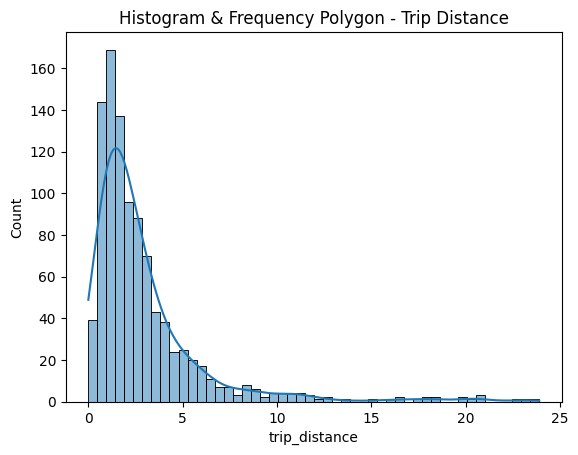

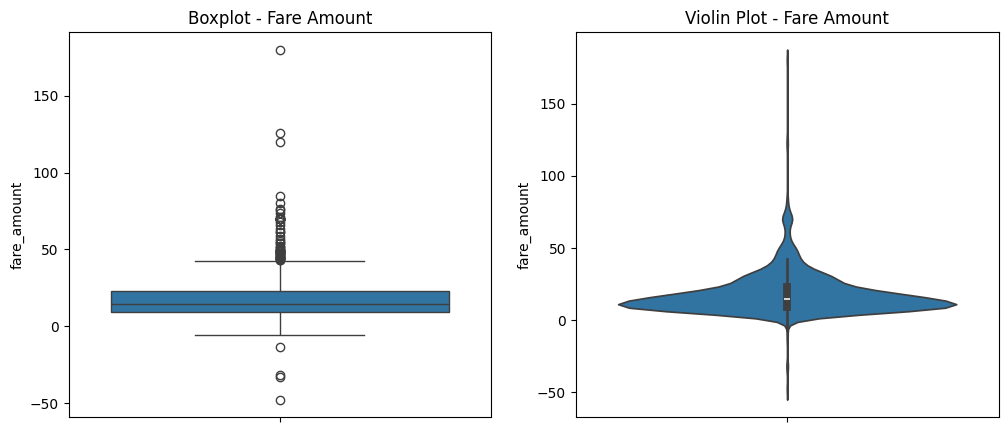

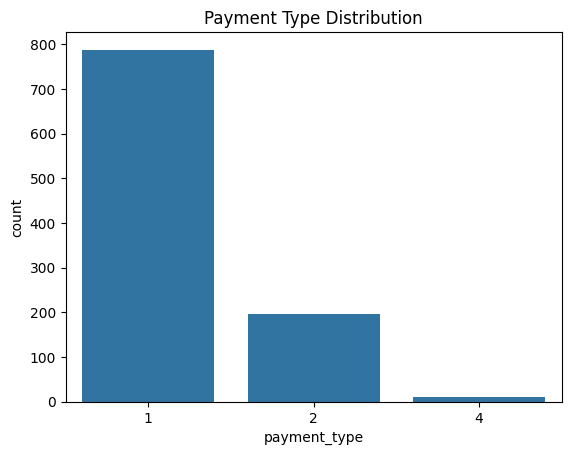

In [ ]:
#Task 2: Visualizations

sns.histplot(df["trip_distance"], kde=True, bins=50)
plt.title("Histogram & Frequency Polygon - Trip Distance")
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(12,5))
sns.boxplot(y=df["fare_amount"], ax=axes[0])
sns.violinplot(y=df["fare_amount"], ax=axes[1])
axes[0].set_title("Boxplot - Fare Amount")
axes[1].set_title("Violin Plot - Fare Amount")
plt.show()

sns.countplot(x="payment_type", data=df)
plt.title("Payment Type Distribution")
plt.show()


In [ ]:
#Part B: Inferential Statistics
#Task 1: Confidence Intervals
def confidence_interval(data, confidence=0.95):
    mean = np.mean(data)
    se = stats.sem(data.dropna())
    interval = stats.t.interval(confidence, len(data.dropna())-1, loc=mean, scale=se)
    return mean, interval

ci_trip = confidence_interval(df["trip_distance"])
ci_fare = confidence_interval(df["fare_amount"])
ci_tip = confidence_interval(df["tip_amount"])

ci_trip, ci_fare, ci_tip




((np.float64(2.8904723618090453),
  (np.float64(2.6960469945886643), np.float64(3.0848977290294264))),
 (np.float64(18.27859296482412),
  (np.float64(17.350630611960245), np.float64(19.206555317687997))),
 (np.float64(3.4831457286432164),
  (np.float64(3.222139940370495), np.float64(3.7441515169159376))))

In [ ]:
#Task 2: Hypothesis Testing
t_stat, p_val = stats.ttest_1samp(df["tip_amount"].dropna(), 2)

fare_credit = df[df["payment_type"]==1]["fare_amount"]
fare_cash = df[df["payment_type"]==2]["fare_amount"]
t_stat2, p_val2 = stats.ttest_ind(fare_credit.dropna(), fare_cash.dropna())

contingency = pd.crosstab(df["payment_type"], df["RatecodeID"])
chi2, p_val3, dof, expected = stats.chi2_contingency(contingency)

{
    "One-sample t-test Tip": (t_stat, p_val),
    "Two-sample t-test Fare": (t_stat2, p_val2),
    "Chi-square Test": (chi2, p_val3)
}


{'One-sample t-test Tip': (np.float64(11.150925555592355),
  np.float64(2.7284426078462357e-27)),
 'Two-sample t-test Fare': (np.float64(0.2617797303078717),
  np.float64(0.7935461086827116)),
 'Chi-square Test': (np.float64(6.8534559719244),
  np.float64(0.5525232153774795))}

One-sample t-test checks if the mean tip differs from $2.

Two-sample t-test compares fare averages between credit card and cash payments.

Chi-square test checks independence between payment type and RateCodeID.

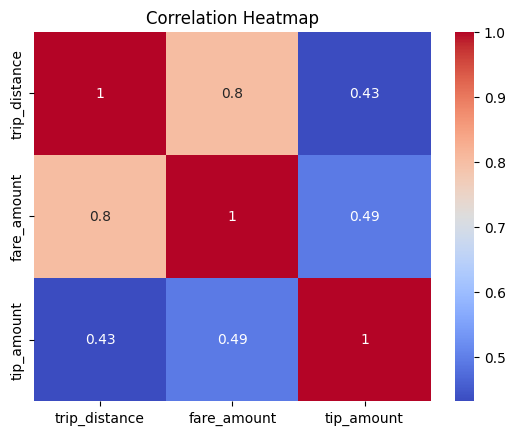

(np.float64(0.8016584022736732), np.float64(0.493059691968126))

In [ ]:
#Task 3: Correlation Analysis
corr1 = df["trip_distance"].corr(df["fare_amount"])
corr2 = df["fare_amount"].corr(df["tip_amount"])

sns.heatmap(df[["trip_distance", "fare_amount", "tip_amount"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

corr1, corr2


Trip distance vs Fare amount: Strong positive correlation (longer trips cost more).

Fare vs Tip: Moderate positive correlation (higher fares usually mean higher tips).

Heatmap visualizes the overall relationships.

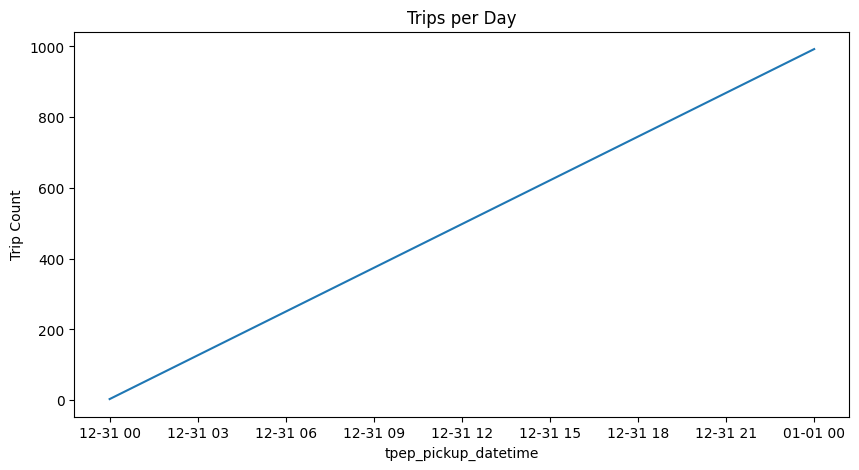

In [ ]:
#bonus track
df["tpep_pickup_datetime"] = pd.to_datetime(df["tpep_pickup_datetime"])
trips_per_day = df.groupby(df["tpep_pickup_datetime"].dt.date).size()

trips_per_day.plot(figsize=(10,5))
plt.title("Trips per Day")
plt.ylabel("Trip Count")
plt.show()


Data cleaning removed invalid/missing values.

Most trips are short distance, low fare.

Outliers exist in fare and tip amounts.

95% confidence intervals provided reliable ranges for key metrics.

T-tests revealed whether tips differ from $2 and if fare differs by payment type.

Chi-square test suggested possible dependency between payment type & rate code.

Correlation shows longer trips → higher fare, higher fares → higher tips.